In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("data/centralNervousSystem_outcome.csv")
data_length = data.shape[1]
data_length

7130

In [3]:
column = []
for i in range(data_length):
    column.append("atribut"+str(i))

In [4]:
data = pd.read_csv("data/centralNervousSystem_outcome.csv", header=None, names=column)
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut7120,atribut7121,atribut7122,atribut7123,atribut7124,atribut7125,atribut7126,atribut7127,atribut7128,atribut7129
0,-60,-109,45,22,7,-61,-211,-102,-20,98,...,1082,-12,44,-48,123,89,-25,56,-63,Class1
1,-159,-113,-62,-16,-160,-395,97,-157,15,-8,...,1295,-677,-452,-750,1273,-1,-750,-45,-293,Class1
2,-119,-31,4,-11,-197,-541,-277,-166,17,392,...,592,55,88,-37,310,159,11,2,2,Class1
3,41,9,-256,370,-302,-680,254,31,186,358,...,433,71,-237,-166,52,-48,-183,328,-244,Class1
4,-165,-57,171,216,-692,-381,762,-6,44,216,...,2160,-120,-82,-25,3888,393,-38,190,38,Class1


In [5]:
data = data.rename(columns={'atribut7129': 'status'})
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut7120,atribut7121,atribut7122,atribut7123,atribut7124,atribut7125,atribut7126,atribut7127,atribut7128,status
0,-60,-109,45,22,7,-61,-211,-102,-20,98,...,1082,-12,44,-48,123,89,-25,56,-63,Class1
1,-159,-113,-62,-16,-160,-395,97,-157,15,-8,...,1295,-677,-452,-750,1273,-1,-750,-45,-293,Class1
2,-119,-31,4,-11,-197,-541,-277,-166,17,392,...,592,55,88,-37,310,159,11,2,2,Class1
3,41,9,-256,370,-302,-680,254,31,186,358,...,433,71,-237,-166,52,-48,-183,328,-244,Class1
4,-165,-57,171,216,-692,-381,762,-6,44,216,...,2160,-120,-82,-25,3888,393,-38,190,38,Class1


In [6]:
data.loc[data['status'] == 'Class0', ['status']] = 0
data.loc[data['status'] == 'Class1', ['status']] = 1
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut7120,atribut7121,atribut7122,atribut7123,atribut7124,atribut7125,atribut7126,atribut7127,atribut7128,status
0,-60,-109,45,22,7,-61,-211,-102,-20,98,...,1082,-12,44,-48,123,89,-25,56,-63,1
1,-159,-113,-62,-16,-160,-395,97,-157,15,-8,...,1295,-677,-452,-750,1273,-1,-750,-45,-293,1
2,-119,-31,4,-11,-197,-541,-277,-166,17,392,...,592,55,88,-37,310,159,11,2,2,1
3,41,9,-256,370,-302,-680,254,31,186,358,...,433,71,-237,-166,52,-48,-183,328,-244,1
4,-165,-57,171,216,-692,-381,762,-6,44,216,...,2160,-120,-82,-25,3888,393,-38,190,38,1


In [7]:
data = data.apply(pd.to_numeric)

In [8]:
data['status'].value_counts()

0    39
1    21
Name: status, dtype: int64

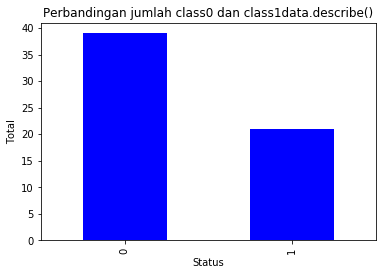

In [9]:
import matplotlib.pyplot as plt
data['status'].value_counts().plot(kind='bar', color="b")
plt.title("Perbandingan jumlah class0 dan class1data.describe()")
plt.xlabel('Status')
plt.ylabel('Total')
plt.show()

In [10]:
data.describe()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut7120,atribut7121,atribut7122,atribut7123,atribut7124,atribut7125,atribut7126,atribut7127,atribut7128,status
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,-95.083333,-91.650000,8.366667,95.033333,-231.966667,-343.350000,53.616667,-160.266667,57.316667,129.033333,...,1005.216667,40.350000,42.233333,-104.583333,828.400000,239.316667,-46.716667,145.400000,-73.616667,0.350000
std,120.779852,119.931736,122.938040,156.914526,179.484853,215.094841,415.350417,121.334091,142.484789,183.066531,...,543.947190,253.988978,217.455966,169.772858,725.377101,222.140473,175.811734,210.018014,125.839701,0.480995
min,-492.000000,-414.000000,-300.000000,-370.000000,-746.000000,-1216.000000,-1231.000000,-528.000000,-238.000000,-462.000000,...,52.000000,-677.000000,-452.000000,-750.000000,-140.000000,-53.000000,-750.000000,-350.000000,-466.000000,0.000000
25%,-152.250000,-131.500000,-62.250000,-4.000000,-312.000000,-407.500000,-190.000000,-192.500000,-12.250000,6.000000,...,608.500000,-53.250000,-56.750000,-121.750000,421.250000,92.000000,-61.250000,38.500000,-103.500000,0.000000
50%,-82.500000,-76.500000,18.500000,74.000000,-173.000000,-300.000000,72.500000,-134.500000,30.000000,107.000000,...,941.500000,64.500000,62.500000,-79.000000,651.500000,205.500000,-25.000000,116.000000,-41.000000,0.000000
75%,-26.750000,-30.250000,91.000000,214.250000,-111.250000,-219.250000,337.250000,-77.000000,114.250000,250.750000,...,1238.000000,133.000000,151.500000,-9.750000,1032.250000,319.500000,20.000000,190.500000,-4.000000,1.000000
max,216.000000,238.000000,362.000000,378.000000,81.000000,34.000000,896.000000,31.000000,683.000000,497.000000,...,2936.000000,730.000000,629.000000,110.000000,3888.000000,1261.000000,346.000000,788.000000,184.000000,1.000000


In [11]:
X = data.drop(['status'],axis=1)
y = data['status']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=45)

In [13]:
def minmax_scaler(X_train_, X_test_):
    scaler = MinMaxScaler()
    X_train_ = scaler.fit_transform(X_train_)
    X_test_ = scaler.transform(X_test_)
    return X_train_,X_test_

In [14]:
X_train_, X_test_ = minmax_scaler(X_train,X_test)
X_train = pd.DataFrame(data=X_train_, columns=X_train.columns)
X_test = pd.DataFrame(data=X_test_, columns=X_test.columns)

In [15]:
# korelasi = data.corr().drop(['status'],axis=1).drop(['status'],axis=0)
# korelasi.columns

In [16]:
from sklearn.feature_selection import f_classif
f_score, f_p_value = f_classif(X,y)
print('F - score score   ', f_score)
print('F - score p-value ', f_p_value)

F - score score    [0.70171445 2.45342609 0.09856477 ... 1.86640248 1.57942918 0.39051409]
F - score p-value  [0.40564693 0.12270886 0.75468525 ... 0.17716145 0.21388081 0.53448017]


In [17]:
import random

In [18]:
def random_subset(s, n_features = 3, n_iter=10):
    listSubset = []
    for i in range(n_iter):
        listSubset.append(random.sample(list(s),n_features))
    return listSubset

In [19]:
def count_redundancy(cor):
    korr = []
    korr = cor.values
    np.fill_diagonal(korr,0)
    korr = np.concatenate(korr)
    korr = np.unique(korr)
    sum_kor = np.sum(korr)
    return sum_kor

In [20]:
def mrmr(X,y,n_features=3,n_iter=10):
    subset = random_subset(X.columns,n_features,n_iter)
    mrmr_list = []
    for i in subset:
        korelasi = X[i].corr()
        red = count_redundancy(korelasi)
        f_score, f_p_value = f_classif(X[i],y)
        rel = np.sum(f_score)
        mrmr_score = rel - ((1/len(subset))*red)
        mrmr_list.append((i,mrmr_score))
    return sorted(mrmr_list,key=lambda l:l[1],reverse=True)

In [21]:
taken_featuresTrain = mrmr(X_train,y_train,5000,10)[0][0]
taken_featuresTrain

['atribut5230',
 'atribut1607',
 'atribut2394',
 'atribut1899',
 'atribut143',
 'atribut6307',
 'atribut3086',
 'atribut520',
 'atribut6112',
 'atribut5699',
 'atribut2460',
 'atribut269',
 'atribut2433',
 'atribut1204',
 'atribut3268',
 'atribut6696',
 'atribut2550',
 'atribut6204',
 'atribut1227',
 'atribut2579',
 'atribut4633',
 'atribut2397',
 'atribut1445',
 'atribut5866',
 'atribut1430',
 'atribut1537',
 'atribut1708',
 'atribut5893',
 'atribut5779',
 'atribut47',
 'atribut3007',
 'atribut315',
 'atribut927',
 'atribut56',
 'atribut3667',
 'atribut418',
 'atribut719',
 'atribut202',
 'atribut287',
 'atribut6720',
 'atribut6744',
 'atribut6216',
 'atribut2924',
 'atribut4640',
 'atribut2236',
 'atribut3123',
 'atribut6709',
 'atribut5382',
 'atribut3037',
 'atribut6433',
 'atribut6162',
 'atribut6146',
 'atribut5629',
 'atribut5159',
 'atribut3752',
 'atribut3444',
 'atribut1166',
 'atribut6628',
 'atribut6994',
 'atribut5645',
 'atribut4740',
 'atribut4290',
 'atribut5735',
 'atr

In [22]:
X_train_mrmr = X_train[taken_featuresTrain].copy()

In [23]:
taken_featuresTest = mrmr(X_test,y_test,5000,10)[0][0]
taken_featuresTest

['atribut5097',
 'atribut5588',
 'atribut4547',
 'atribut6431',
 'atribut3285',
 'atribut4895',
 'atribut3218',
 'atribut2921',
 'atribut5282',
 'atribut3563',
 'atribut3187',
 'atribut4588',
 'atribut6458',
 'atribut6802',
 'atribut87',
 'atribut1824',
 'atribut3211',
 'atribut2866',
 'atribut4163',
 'atribut3279',
 'atribut4109',
 'atribut6608',
 'atribut1482',
 'atribut2805',
 'atribut6660',
 'atribut1810',
 'atribut6182',
 'atribut3809',
 'atribut6093',
 'atribut2480',
 'atribut5656',
 'atribut5111',
 'atribut5666',
 'atribut462',
 'atribut6534',
 'atribut5378',
 'atribut1222',
 'atribut2650',
 'atribut6994',
 'atribut654',
 'atribut4711',
 'atribut2195',
 'atribut5376',
 'atribut209',
 'atribut5300',
 'atribut1518',
 'atribut5048',
 'atribut352',
 'atribut6797',
 'atribut4750',
 'atribut604',
 'atribut2219',
 'atribut796',
 'atribut1741',
 'atribut4102',
 'atribut5170',
 'atribut5695',
 'atribut6228',
 'atribut571',
 'atribut6829',
 'atribut314',
 'atribut3062',
 'atribut2861',
 '

In [24]:
X_test_mrmr = X_test[taken_featuresTest].copy()

In [25]:
model_rfg = RandomForestClassifier()

In [26]:
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto', 'log2'],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]
                     }

In [27]:
random_search = RandomizedSearchCV(estimator=model_rfg,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8,
                                   n_jobs = -1)

# Fit the random search model
random_search.fit(X_train_mrmr, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [28]:
print("Best Params : ",random_search.best_params_)
print()
means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, random_search.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params :  {'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'bootstrap': False}

0.625 (+/-0.102) for {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': True}
0.625 (+/-0.102) for {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}
0.604 (+/-0.156) for {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}
0.604 (+/-0.156) for {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'bootstrap': False}
0.625 (+/-0.102) for {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': True}
0.625 (+/-0.102) for {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': True}
0.562 (+/-0.270) for {'n_estimators': 400, 'min_samples_split': 2, '

In [29]:
random_search.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'bootstrap': False}

In [30]:
grid_params = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto'],
               'min_samples_split': [5],
               'min_samples_leaf': [4],
               'bootstrap': [False]
                     }

In [31]:
grid_search = GridSearchCV(estimator=model_rfg,
                                   param_grid=grid_params,
                                   cv=3, 
                                   verbose=1, 
                                   n_jobs = -1)

grid_search.fit(X_train_mrmr, y_train)
print("Best Params : ",grid_search.best_params_)
print()
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    9.1s finished


Best Params :  {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}

0.625 (+/-0.204) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
0.583 (+/-0.212) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 400}
0.625 (+/-0.177) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 600}
0.583 (+/-0.212) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 800}
0.583 (+/-0.212) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 1000}


In [32]:
classifier = grid_search.best_estimator_

In [33]:
classifier.fit(X_train_mrmr, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
prediksi = classifier.predict(X_test_mrmr)
prediksi

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [35]:
pd.DataFrame({
    "status" : y_test,
    "status predicted" : prediksi
})

,status,status predicted
5,1,0
26,0,0
57,0,0
39,0,0
36,0,0
50,0,0
42,0,0
19,1,0
25,0,0
18,1,0


In [36]:
accuracy_score(y_test,prediksi)

0.75

In [37]:
print(classification_report(y_test, prediksi))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       0.00      0.00      0.00         3

    accuracy                           0.75        12
   macro avg       0.38      0.50      0.43        12
weighted avg       0.56      0.75      0.64        12



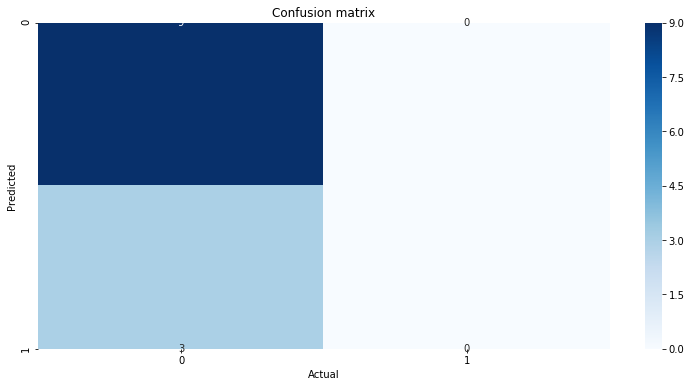

In [38]:
aux_df = data[['status']].drop_duplicates().sort_values('status')
conf_matrix = confusion_matrix(y_test, prediksi)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['status'].values, 
            yticklabels=aux_df['status'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [39]:
confusion_matrix(y_test,prediksi)

array([[9, 0],
       [3, 0]], dtype=int64)